In [16]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../Class")
sys.path.append("../utils")

import numpy as np
import matplotlib.pyplot as plt
from loss import MSELoss, LogSoftMaxCrossEntropy, BCELoss
from transformations import TanH, SoftMax, ReLU 
from encapsulage import Sequential, Optim
from AutoEncoder import AutoEncoder
from sklearn.datasets import fetch_openml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.values.astype('float32') / 255
X = X.reshape(-1, 784)

X_train = X[:60000]

/Library/Python/3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
def train_and_visualize(autoencoder, optimizer, X_train, batch_size, epochs, display_num=10):
    for epoch in range(epochs):
        np.random.shuffle(X_train)
       
        for start_idx in range(0, len(X_train), batch_size):
            end_idx = min(start_idx + batch_size, len(X_train))
            batch_x = X_train[start_idx:end_idx]

            loss = optimizer.step(batch_x, batch_x)
        
        print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

        # reconstruct les images apres chaque epoch

        test_images = X_train[:display_num]
        reconstructed_images = autoencoder.forward(test_images)

        fig, axes = plt.subplots(2, display_num, figsize=(20, 4))
        for i in range(display_num):
            axes[0, i].imshow(test_images[i].reshape(28, 28), cmap='gray')
            axes[0, i].axis('off')
            axes[1, i].imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
            axes[1, i].axis('off')
        plt.show()



### Fonction d'activation TanH et Fonction de loss MSE

Epoch 1, Loss: 39.3544


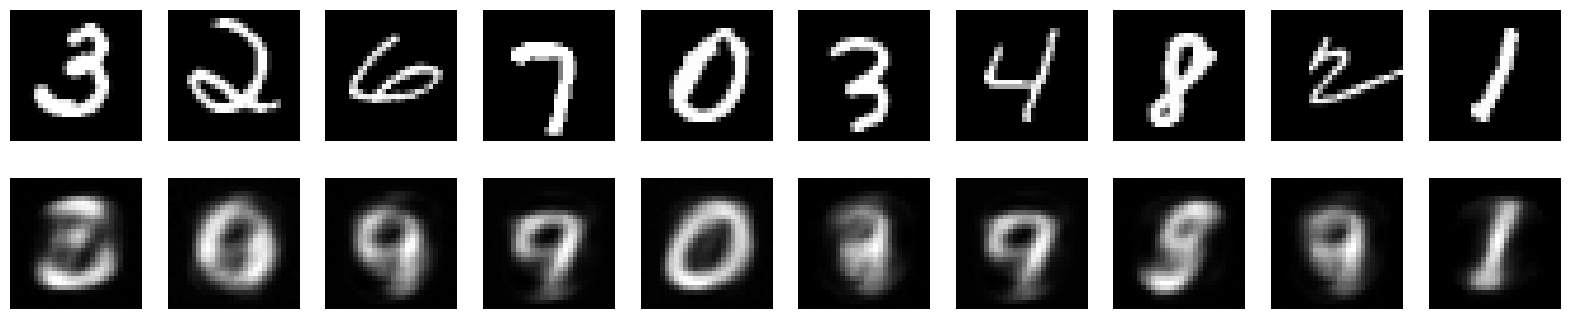

Epoch 2, Loss: 30.7211


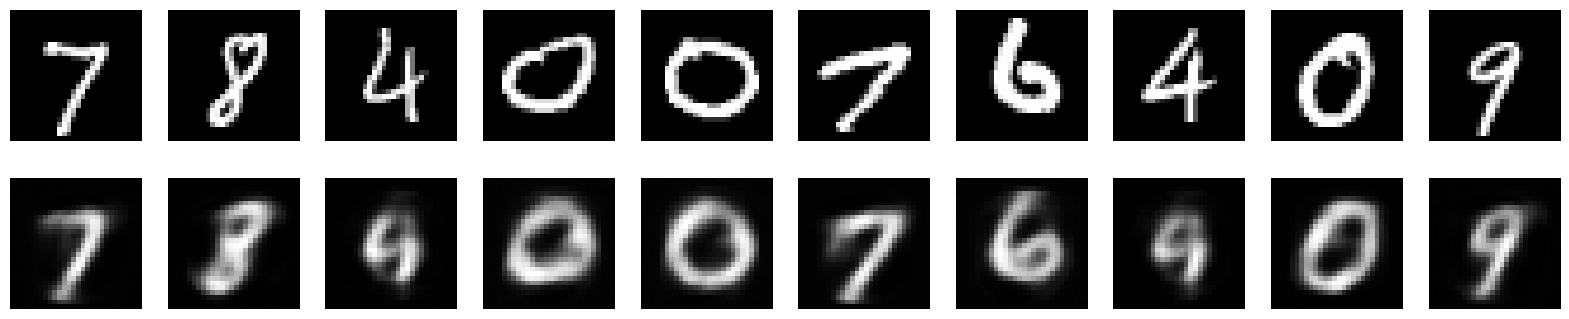

Epoch 3, Loss: 29.7202


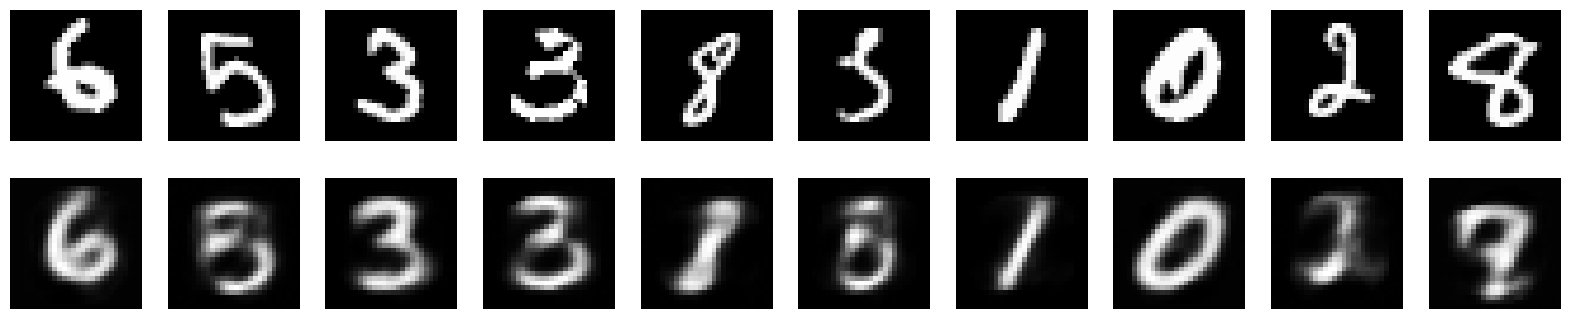

Epoch 4, Loss: 27.1418


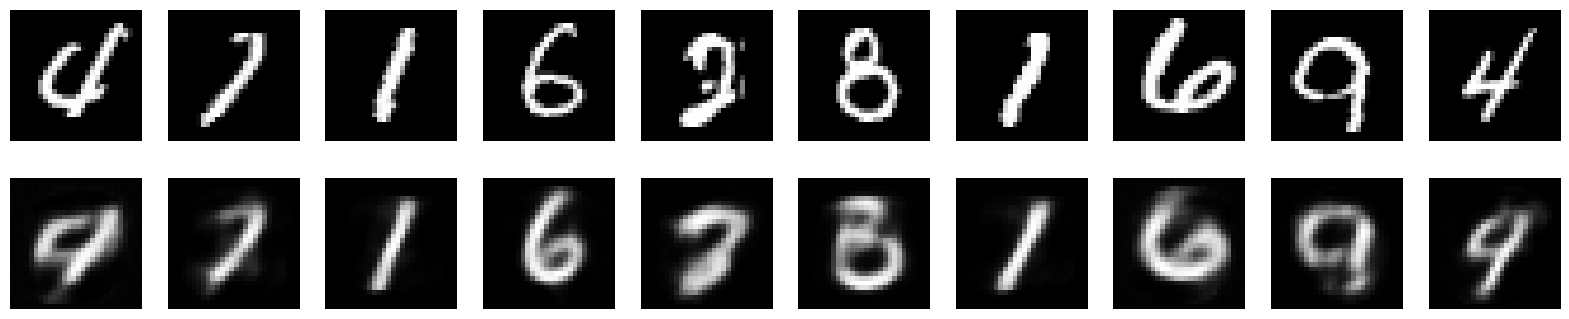

Epoch 5, Loss: 28.0543


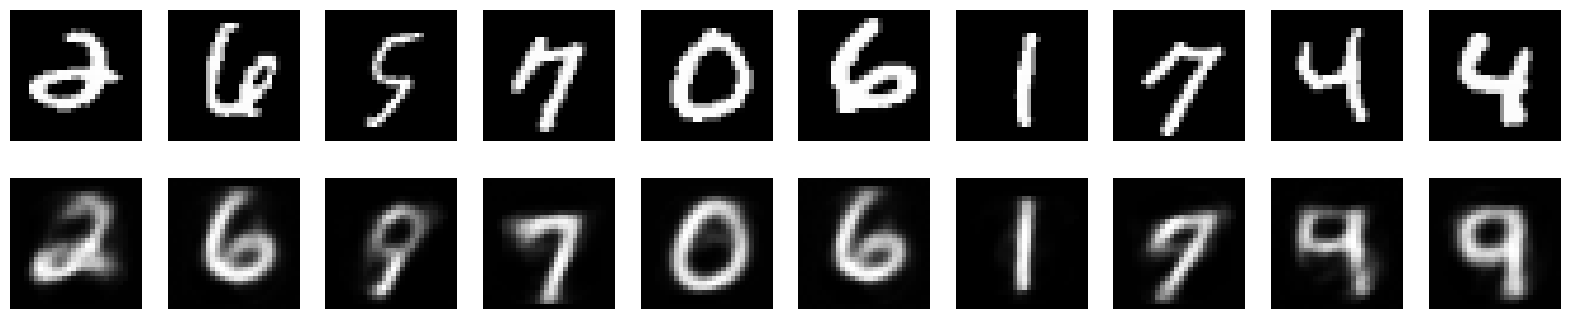

Epoch 6, Loss: 23.6488


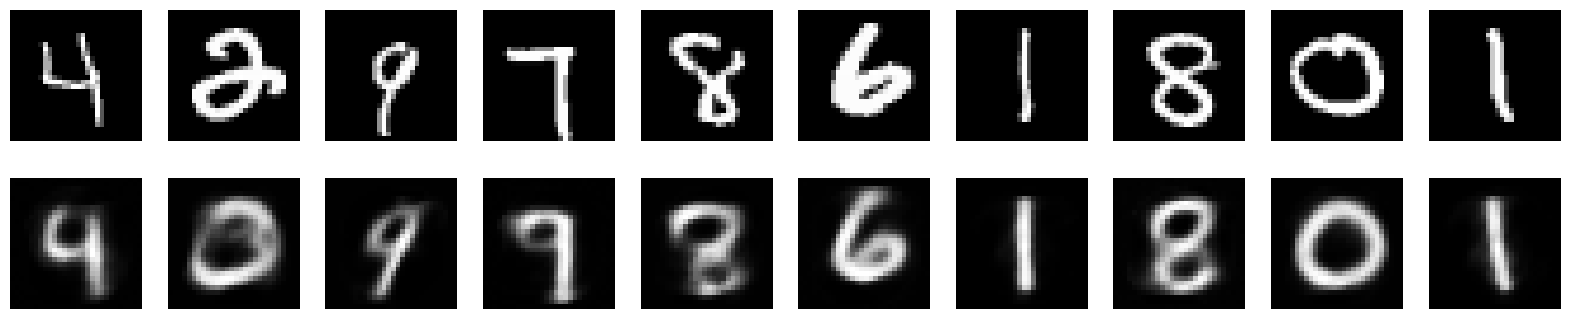

Epoch 7, Loss: 27.3073


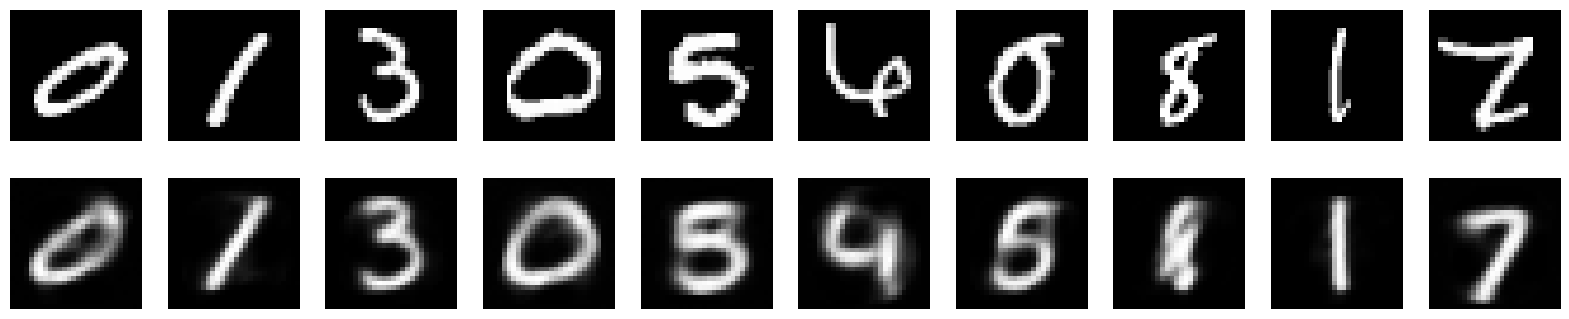

Epoch 8, Loss: 25.3763


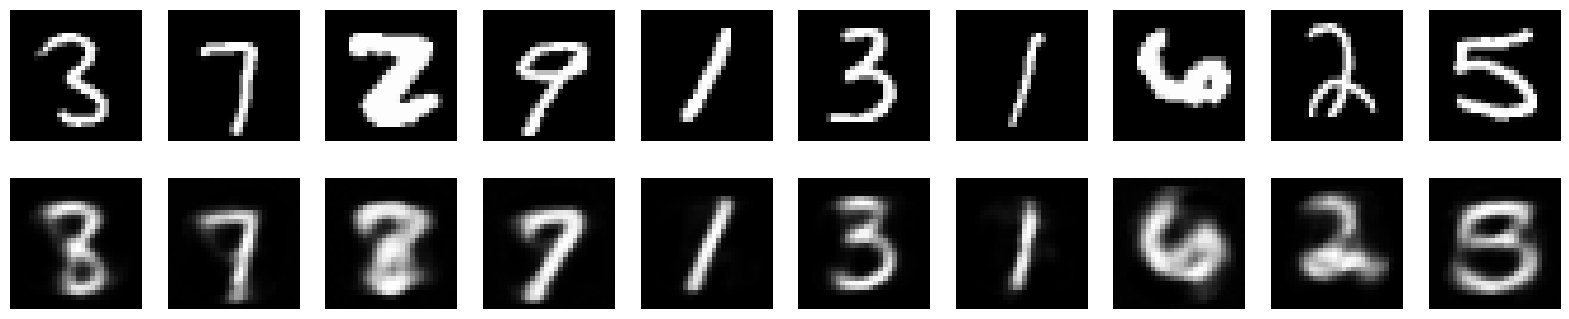

Epoch 9, Loss: 27.0052


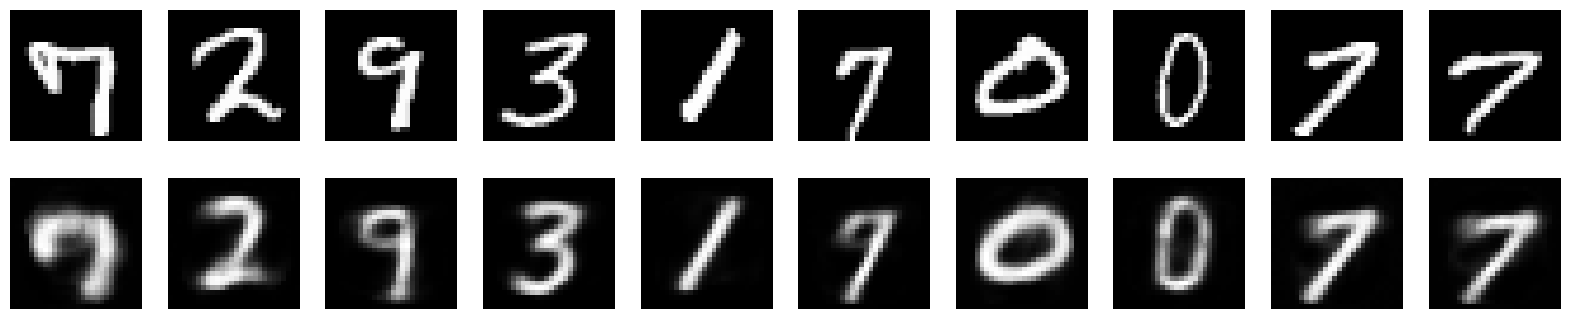

Epoch 10, Loss: 24.5696


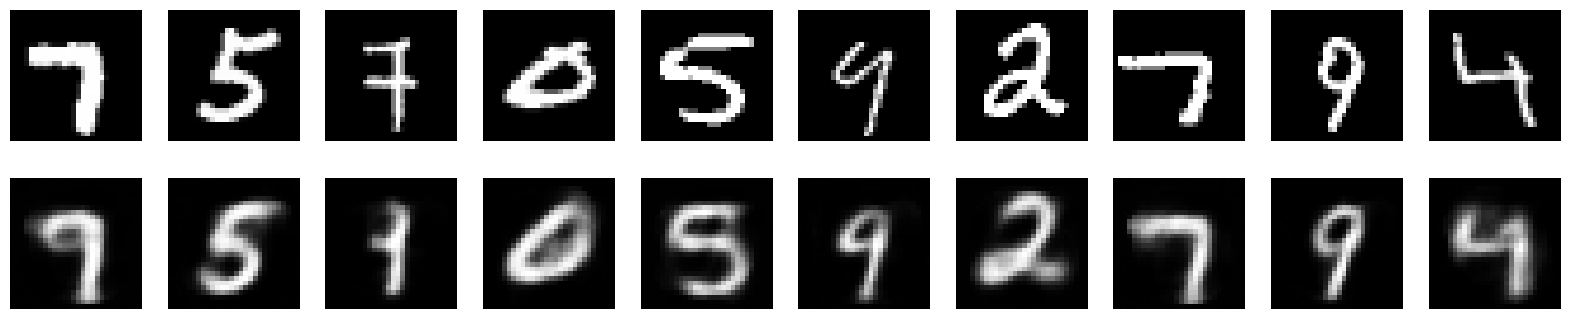

In [5]:
autoencoder = AutoEncoder(DIM_IN=784, fc_act=TanH())
full_autoencoder = Sequential(
            *autoencoder.encoder.modules,
            *autoencoder.decoder.modules
        )
optimizer = Optim(full_autoencoder, MSELoss(), 1e-3)

train_and_visualize(autoencoder, optimizer, X_train, batch_size=256, epochs=10)

### Fonction d'activation ReLU et Fonction de loss BCE

Epoch 1, Loss: 2539.4471


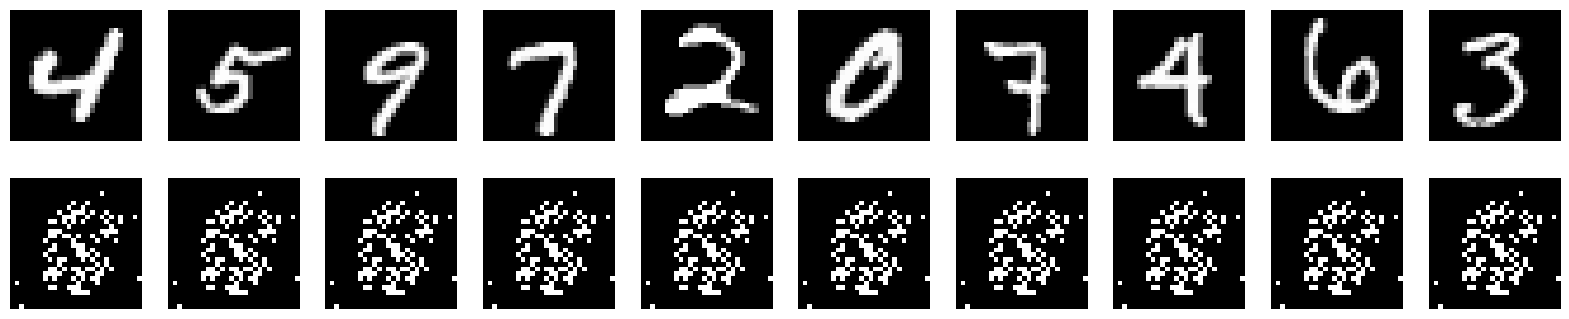

Epoch 2, Loss: 2624.9542


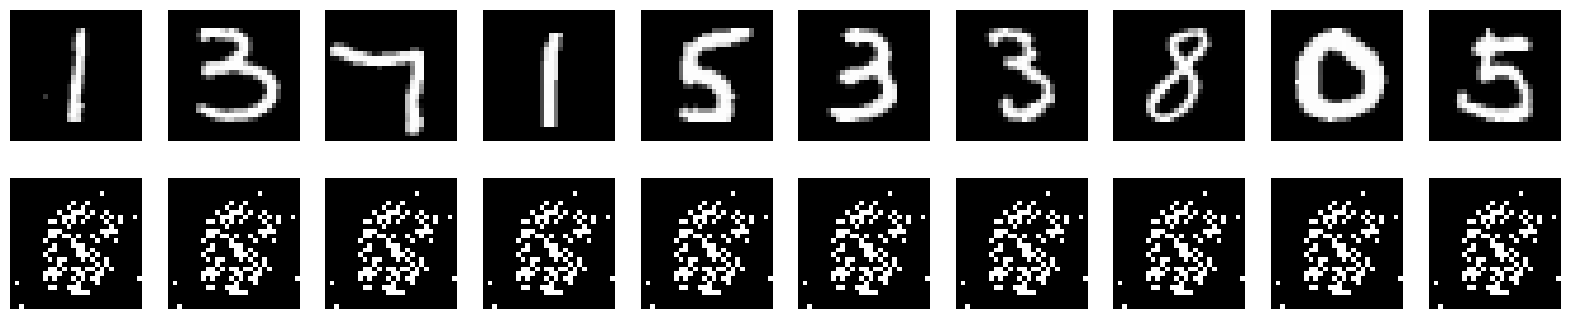

Epoch 3, Loss: 2576.0013


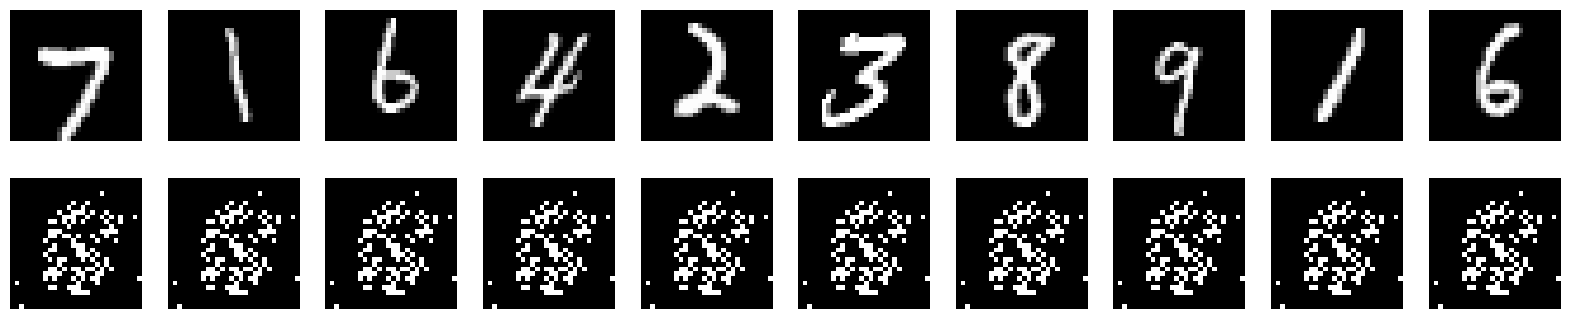

Epoch 4, Loss: 2597.1526


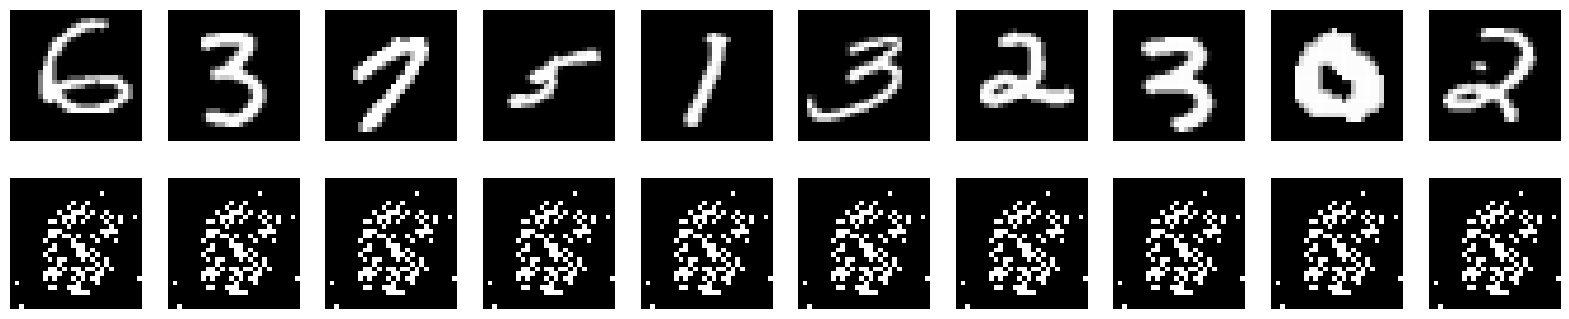

Epoch 5, Loss: 2566.0668


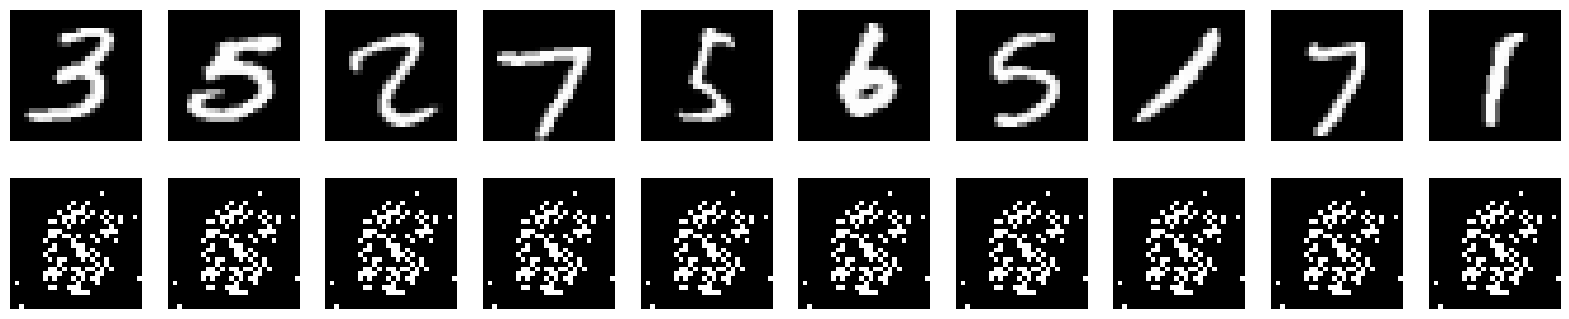

Epoch 6, Loss: 2652.9699


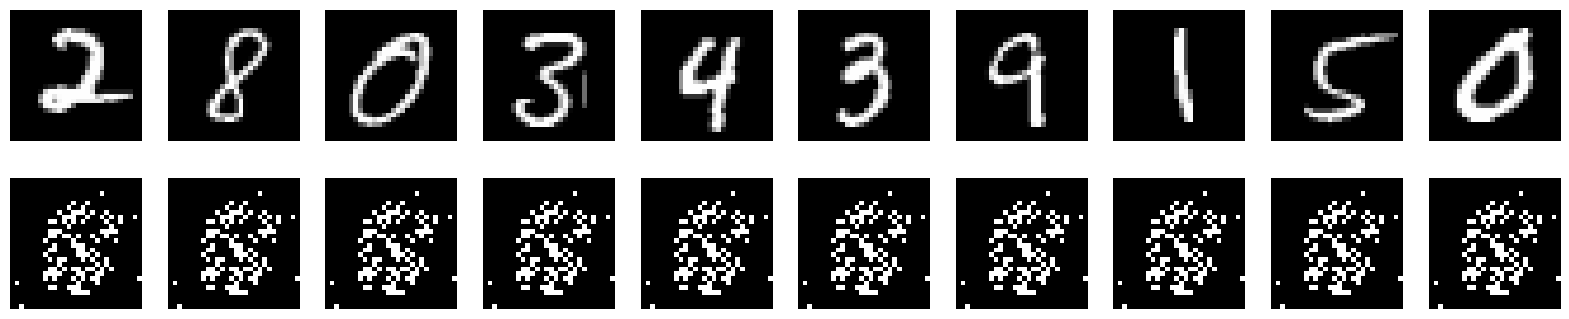

Epoch 7, Loss: 2600.3030


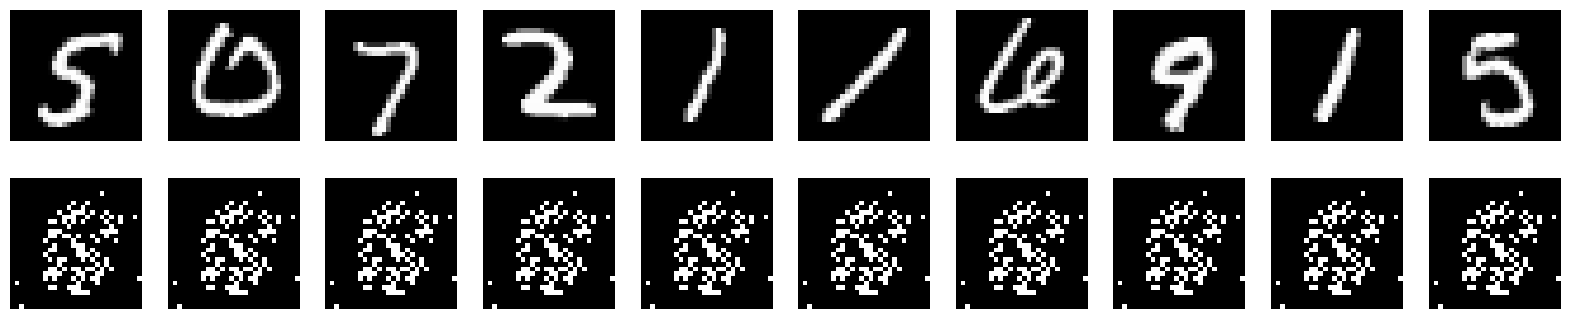

Epoch 8, Loss: 2571.4566


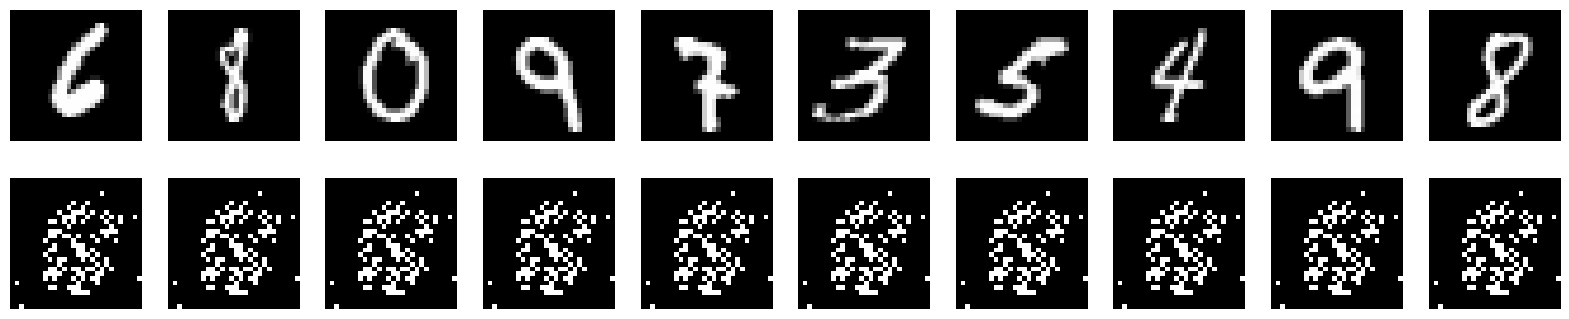

Epoch 9, Loss: 2572.6025


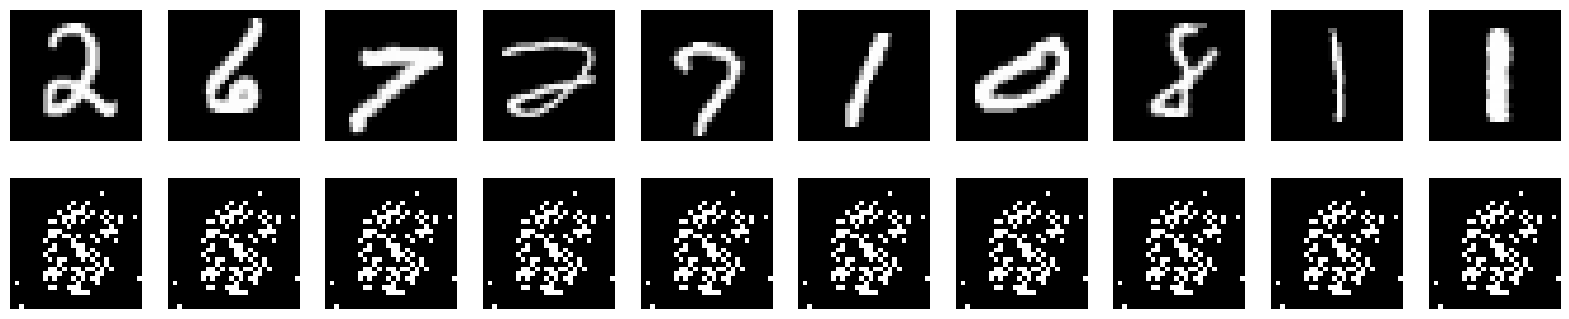

Epoch 10, Loss: 2578.3292


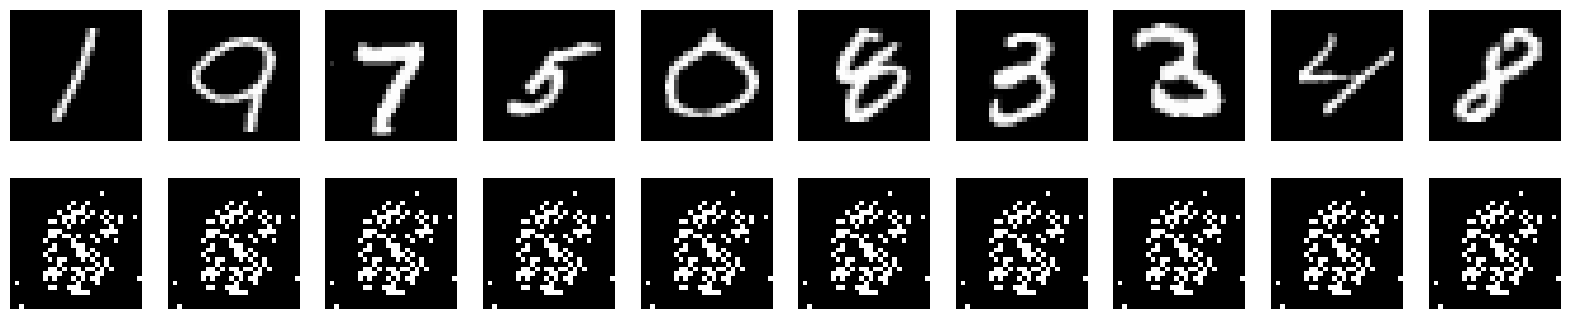

In [15]:
autoencoder2 = AutoEncoder(DIM_IN=784, fc_act=ReLU())
full_autoencoder2 = Sequential(
            *autoencoder2.encoder.modules,
            *autoencoder2.decoder.modules
        )
optimizer = Optim(full_autoencoder2, BCELoss(), 1e-3)

X_train = X[:50000]
train_and_visualize(autoencoder2, optimizer, X_train, batch_size=256, epochs=10)

Epoch 1, Loss: 95.3802


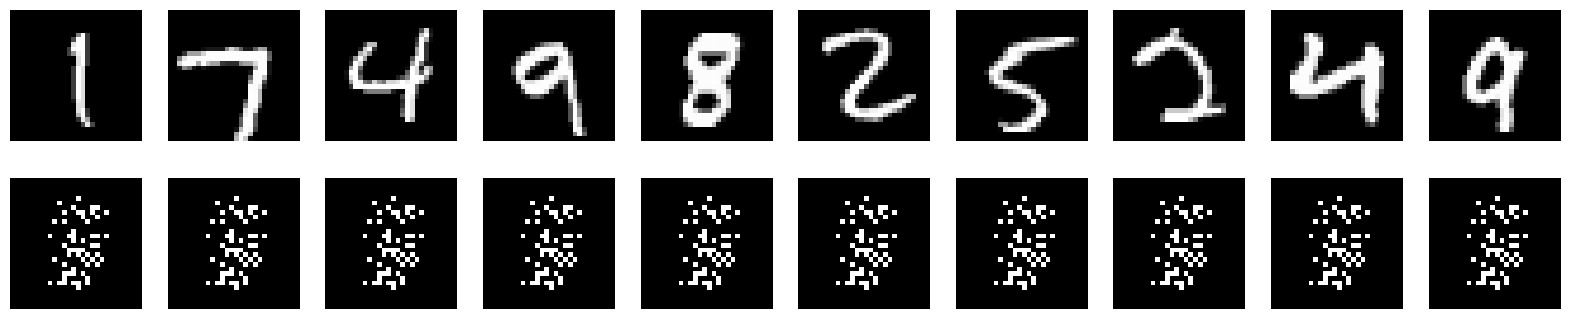

Epoch 2, Loss: 102.9396


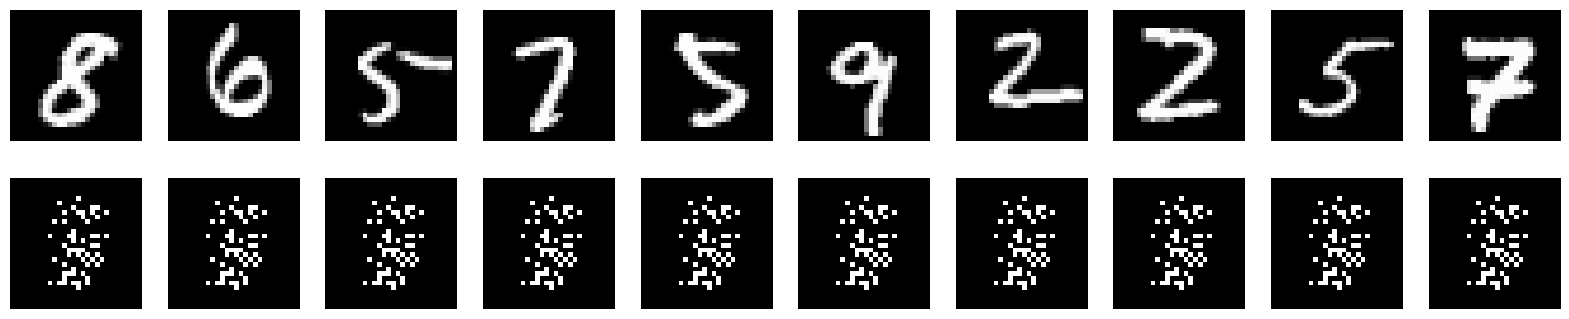

Epoch 3, Loss: 102.2618


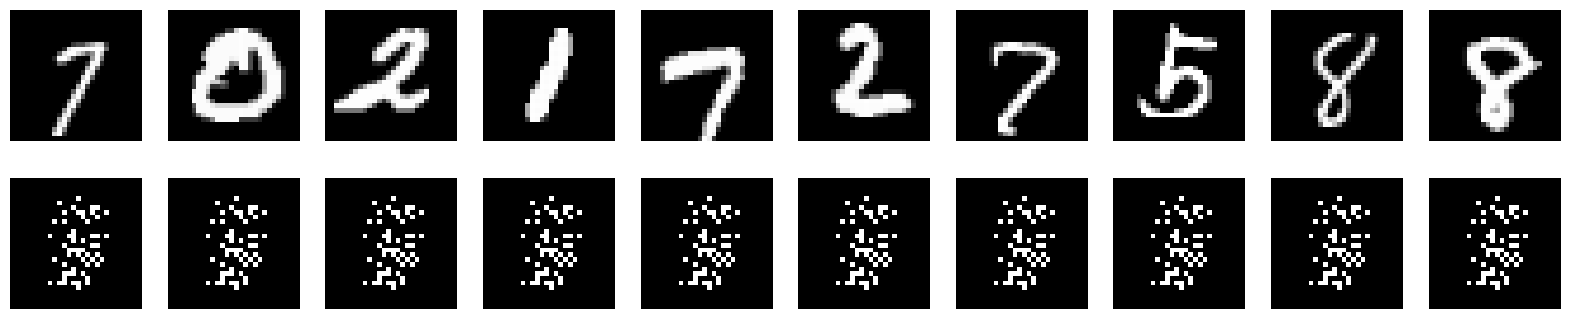

Epoch 4, Loss: 94.3522


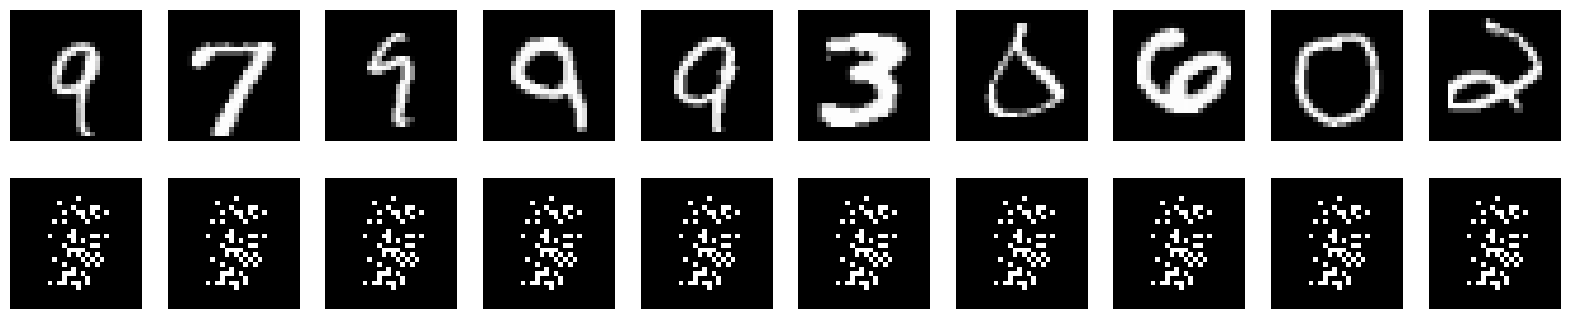

Epoch 5, Loss: 97.2180


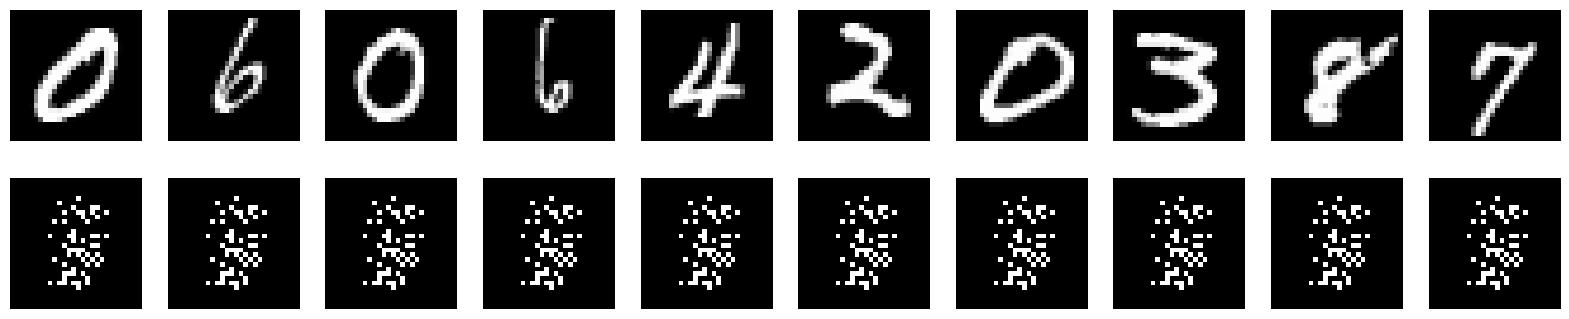

Epoch 6, Loss: 98.9836


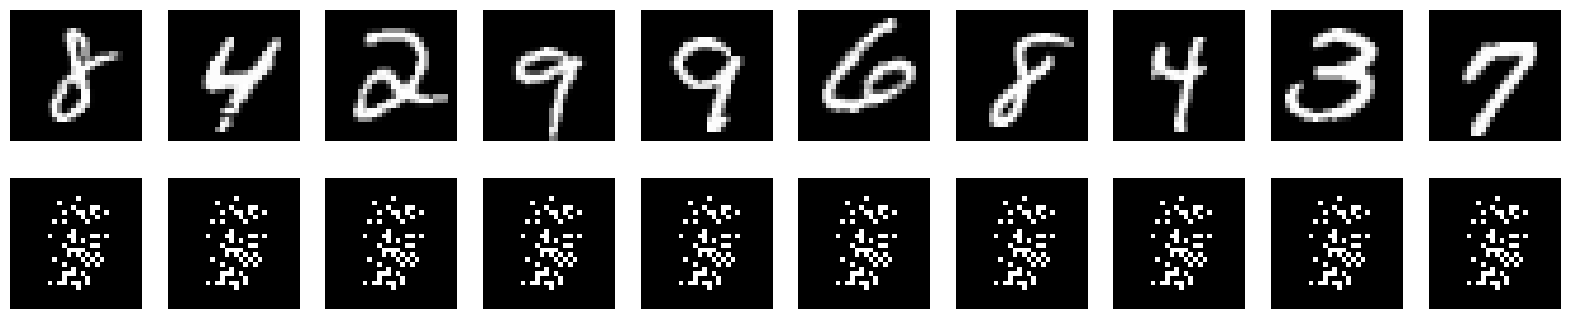

Epoch 7, Loss: 96.3022


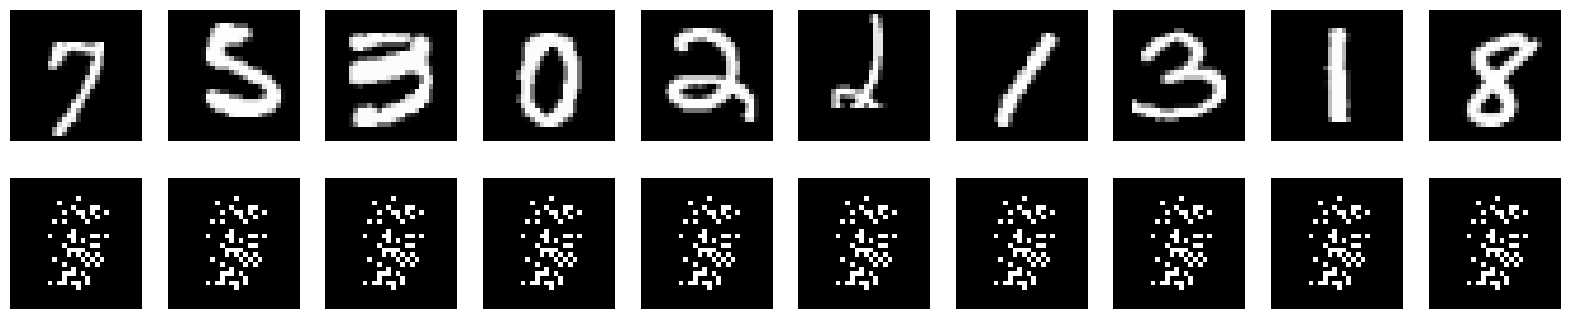

Epoch 8, Loss: 99.1626


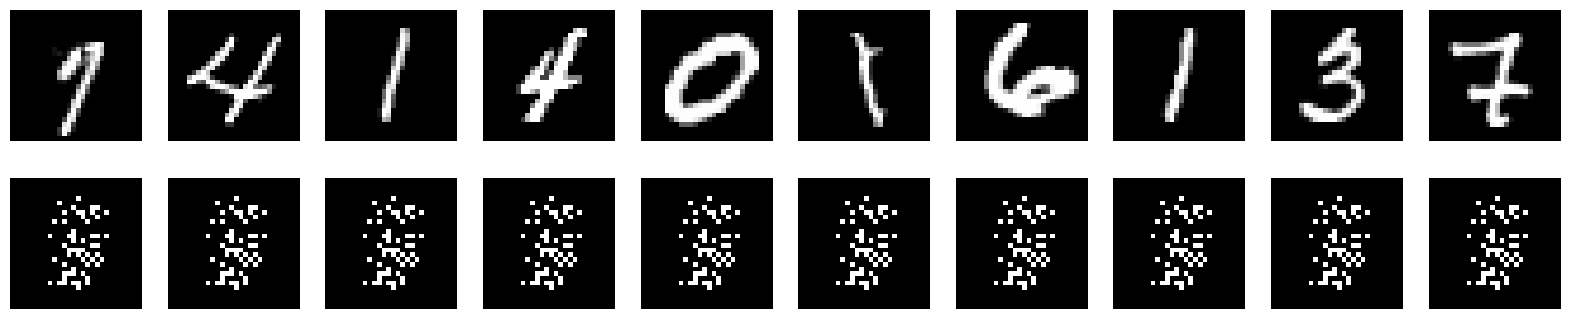

Epoch 9, Loss: 97.3332


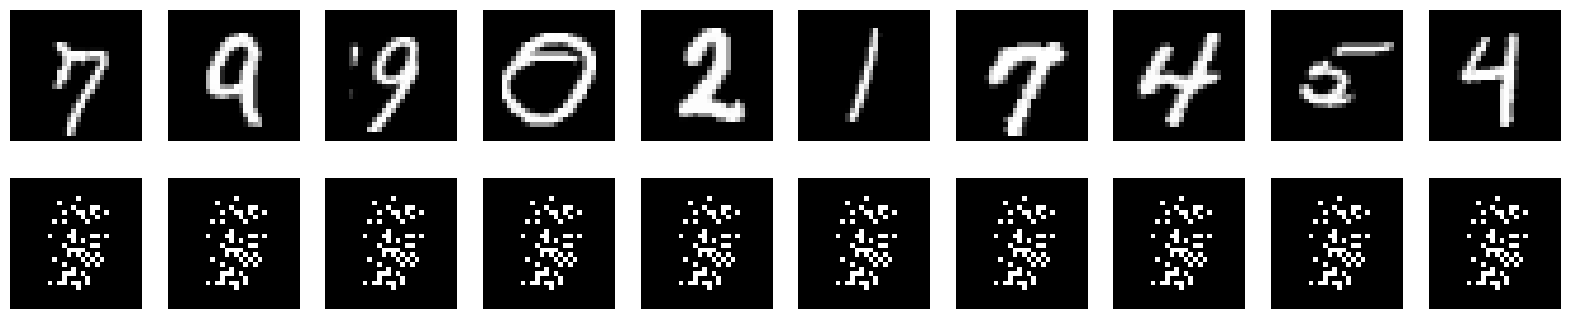

Epoch 10, Loss: 95.1164


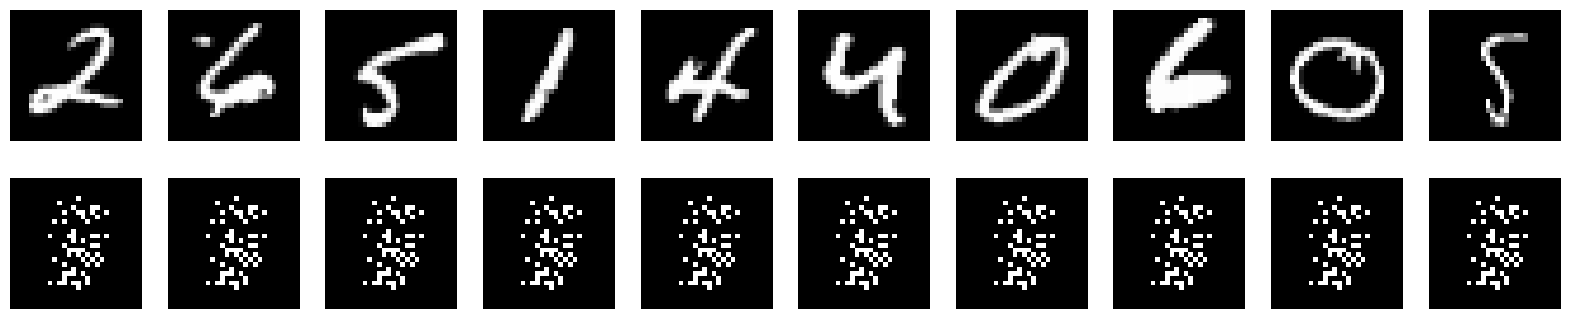

In [13]:
autoencoder3 = AutoEncoder(DIM_IN=784, fc_act=ReLU())
full_autoencoder3 = Sequential(
            *autoencoder3.encoder.modules,
            *autoencoder3.decoder.modules
        )
optimizer = Optim(full_autoencoder3, MSELoss(), 1e-3)

train_and_visualize(autoencoder3, optimizer, X_train, batch_size=256, epochs=10)

Epoch 1, Loss: 2.2206


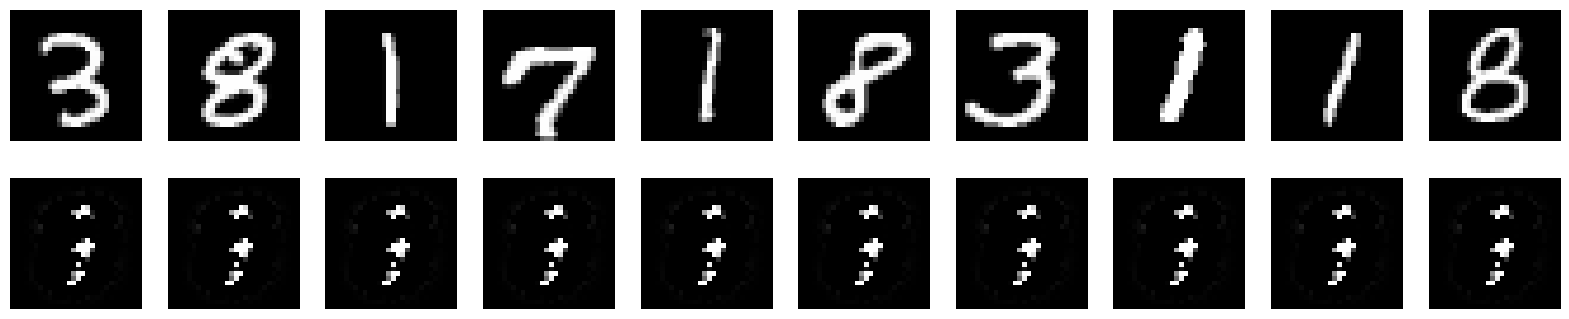

Epoch 2, Loss: 2.1497


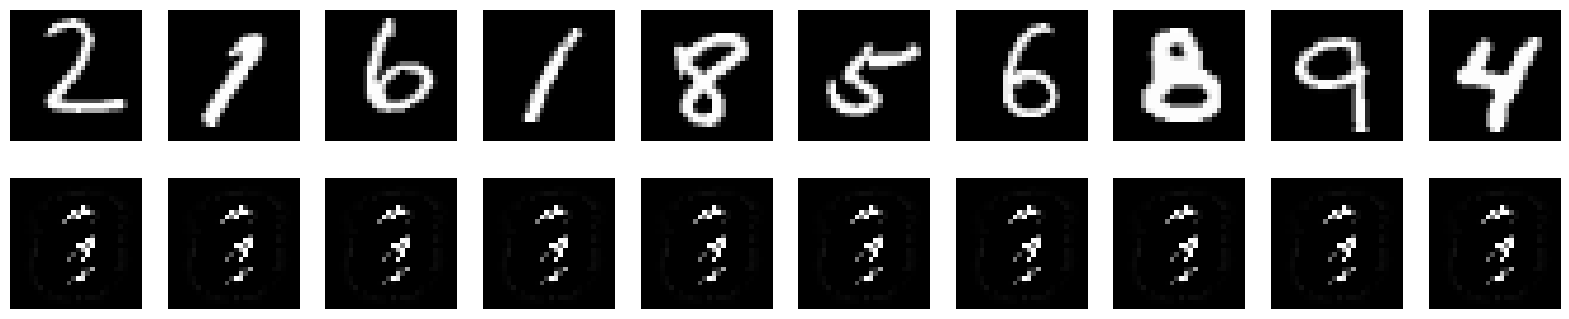

Epoch 3, Loss: 2.0943


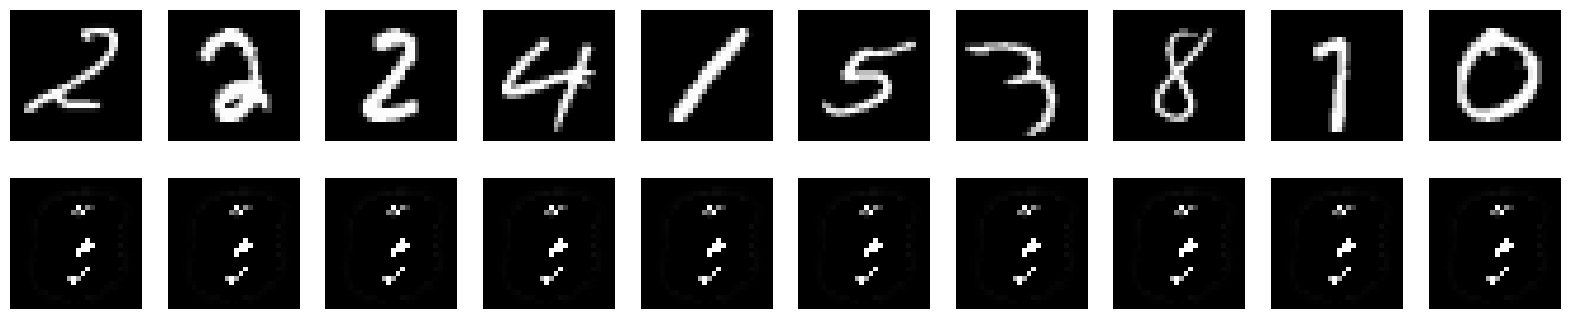

Epoch 4, Loss: 2.2861


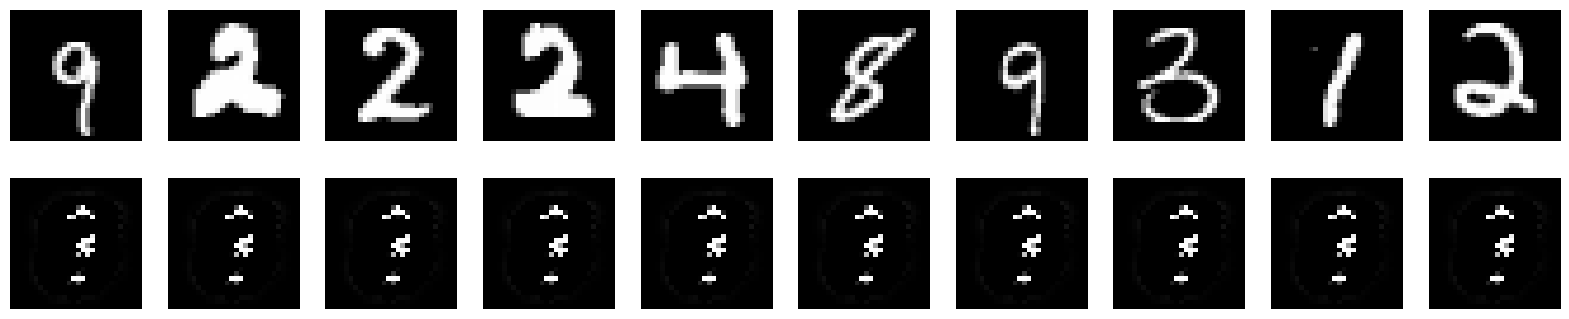

Epoch 5, Loss: 2.1452


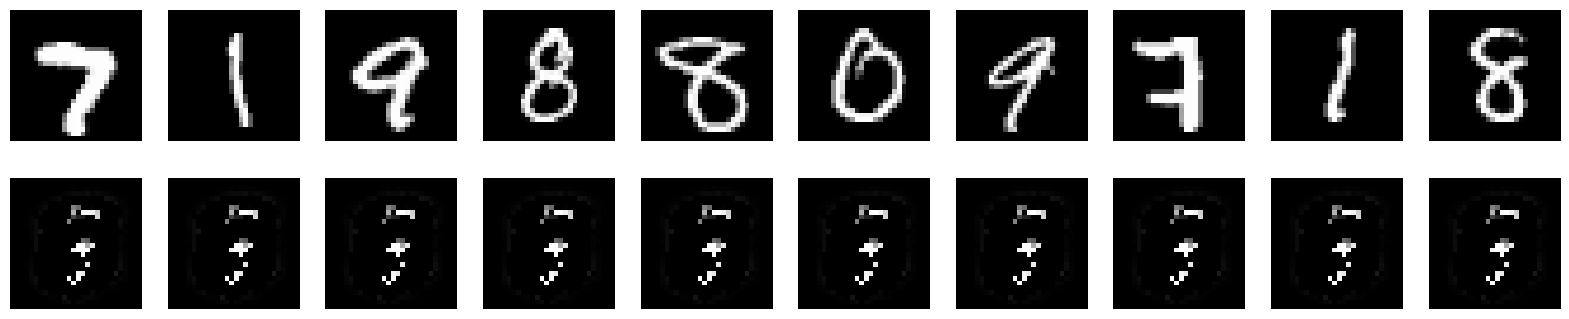

Epoch 6, Loss: 2.1845


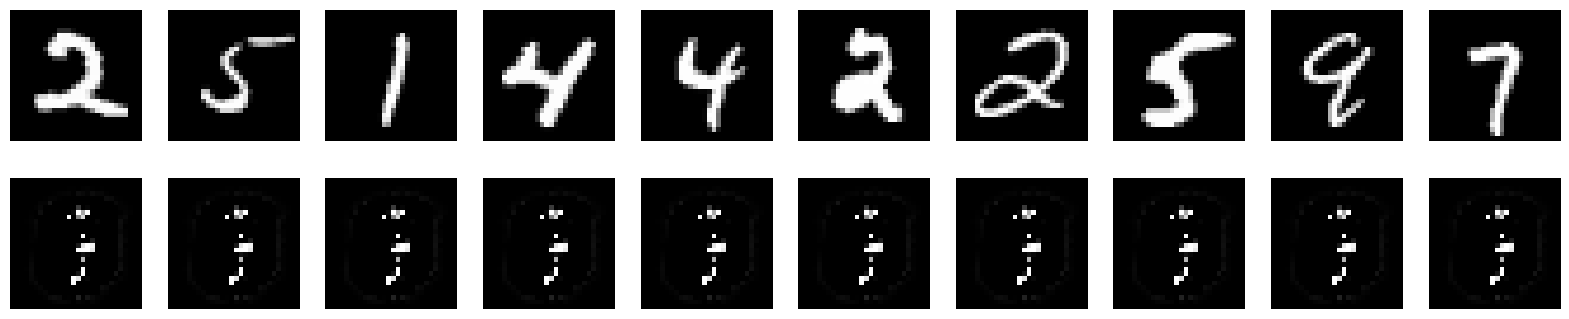

KeyboardInterrupt: 

In [17]:
autoencoder4 = AutoEncoder(DIM_IN=784, fc_act=TanH())
full_autoencoder4 = Sequential(
            *autoencoder4.encoder.modules,
            *autoencoder4.decoder.modules
        )
optimizer = Optim(full_autoencoder4, BCELoss(), 1e-3)

train_and_visualize(autoencoder4, optimizer, X_train, batch_size=256, epochs=10)